## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv(r'RSCCASN.csv', parse_dates=True, index_col='DATE')

In [14]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [17]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

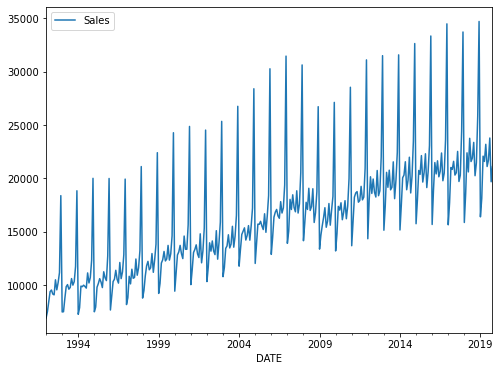

In [19]:
df.plot(figsize=(8,6))

In [20]:
df.shape

(334, 1)

In [22]:
len(df) - 18 #3 18 months..a.5 year)

316

In [23]:
test_size = 18
test_ind = len(df) - test_size

In [24]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [25]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [26]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()


In [29]:
scaler.fit(train)

MinMaxScaler()

In [31]:
scaler_train = scaler.transform(train)

In [32]:
scaler_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [33]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [34]:
length = 12 ## lenght of actual batch
batch_size = 1

generator = TimeseriesGenerator(scaler_train, scaler_train, length=length, batch_size=batch_size)

In [36]:
# x,y = generator[0]
# x,y

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [38]:
n_features = 1


In [39]:
model = Sequential()

model.add(LSTM(100, activation='relu',input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Let's redefine to get 12 months back and then predict the next month out
length = 12
generator = TimeseriesGenerator(scaler_train, scaler_train, length=length, batch_size=1)

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
# generator = TimeseriesGenerator(scaler_train, scaler_train, length=length, batch_size=1)

In [44]:
validation_gen = TimeseriesGenerator(scaler_test, scaler_test, length=length, batch_size=1)

In [49]:
# fit model
model.fit_generator(generator,epochs=20,
                    validation_data=validation_gen,
                   callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
304/304 [==============================] - 23s 77ms/step - loss: 0.0259 - val_loss: 0.0073
Epoch 2/20
304/304 [==============================] - 27s 87ms/step - loss: 0.0185 - val_loss: 0.0536
Epoch 3/20
304/304 [==============================] - 25s 83ms/step - loss: 0.0127 - val_loss: 0.0077


## Evaluate on Test Data

In [51]:
first_eval_batch = scaler_train[-length:]

In [53]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [54]:
model.predict(first_eval_batch)

array([[0.4267685]], dtype=float32)

In [56]:
scaler_test[0]

array([0.61087714])

Now let's put this logic in a for loop to predict into the future for the entire test range.

NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!

In [58]:
test_predictions = []

first_eval_batch = scaler_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [59]:
true_predictions = scaler.inverse_transform(test_predictions)

In [60]:
test['Predictions'] = true_predictions

<ipython-input-60-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [61]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,18692.911882
2018-06-01,21589,18050.012301
2018-07-01,21919,18028.059636
2018-08-01,23381,18718.432891
2018-09-01,20260,17368.713000
2018-10-01,21473,17463.845044
2018-11-01,25831,20293.368092
2018-12-01,34706,24209.463078
2019-01-01,16410,15040.823484


<AxesSubplot:xlabel='DATE'>

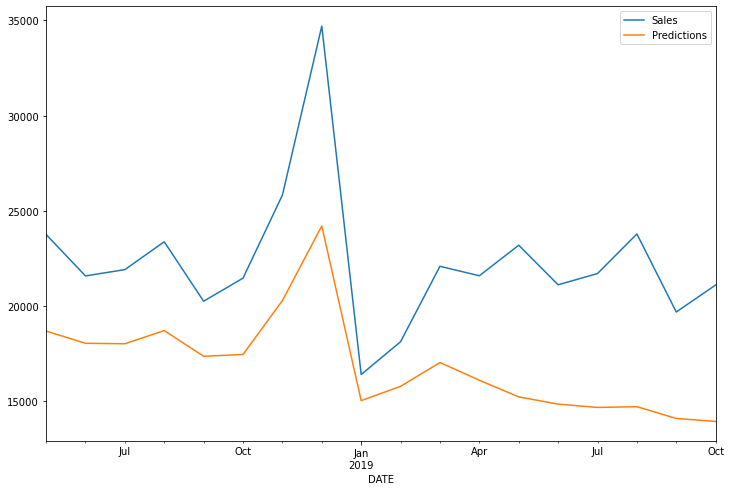

In [62]:
test.plot(figsize=(12,8))

# # Retrain and Forecasting

In [64]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [65]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [67]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


# fit model
model.fit_generator(generator,epochs=8)

Epoch 1/8
322/322 [==============================] - 27s 85ms/step - loss: 0.0271
Epoch 2/8
322/322 [==============================] - 29s 90ms/step - loss: 0.0194
Epoch 3/8
322/322 [==============================] - 30s 92ms/step - loss: 0.0154
Epoch 4/8
322/322 [==============================] - 29s 90ms/step - loss: 0.0102
Epoch 5/8
322/322 [==============================] - 32s 100ms/step - loss: 0.0047
Epoch 6/8
322/322 [==============================] - 33s 103ms/step - loss: 0.0025
Epoch 7/8
322/322 [==============================] - 27s 85ms/step - loss: 0.0022
Epoch 8/8
322/322 [==============================] - 29s 90ms/step - loss: 0.0016


<AxesSubplot:>

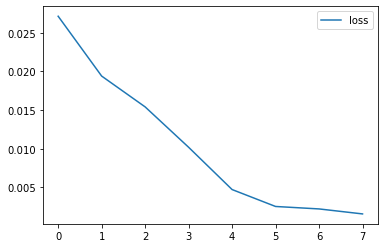

In [68]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [69]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [70]:
forecast = scaler.inverse_transform(forecast)

### Creating new timestamp index with pandas.

In [71]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [72]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [73]:
forecast_df

,Forecast
2019-11-01,26343.799259
2019-12-01,35618.140485
2020-01-01,17610.665956
2020-02-01,19323.573035
2020-03-01,22560.562919
2020-04-01,22215.831467
2020-05-01,23636.656385
2020-06-01,21887.755572
2020-07-01,22486.130884
2020-08-01,24268.884589


<AxesSubplot:>

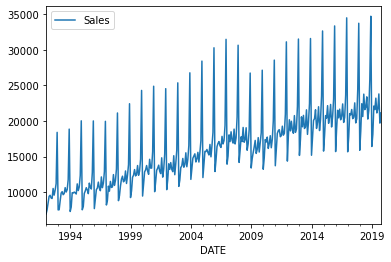

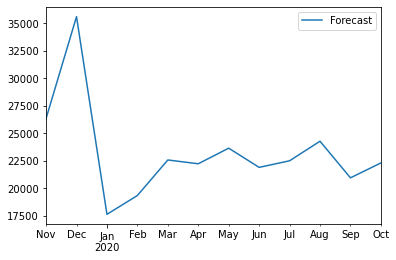

In [74]:
df.plot()
forecast_df.plot()

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

<AxesSubplot:xlabel='DATE'>

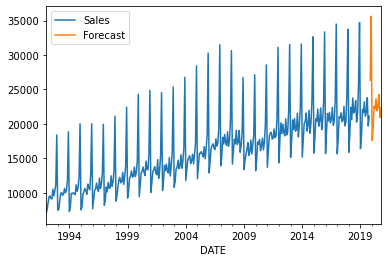

In [75]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

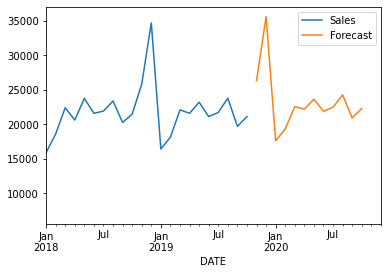

In [76]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')